In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.sparse import csr_matrix
#from sklearn.neighbors import NearestNeighbors
#from sklearn.model_selection import train_test_split

## Loading MovieLens rating dataset of size 100k

In [5]:
DATASET_LINK='http://files.grouplens.org/datasets/movielens/ml-100k.zip'

In [10]:

pip install wget


  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=e3d13c9a7a4c5653866fe659ec55d43bb2e0523c6faf83c6524e2d9e187a42cf
  Stored in directory: c:\users\snehit joshi\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [11]:
output_path = 'C:\Users\SNEHIT JOSHI\Downloads\ml-100k.csv'
data.to_csv(output_path, index=False)





SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (Temp/ipykernel_25056/2154825243.py, line 1)

## u.info     -- The number of users, items, and ratings in the u data set.

In [4]:
import pandas as pd
overall_stats = pd.read_csv('ml-100k/u.info', header=None)
print("Details of users, items and ratings involved in the loaded movielens dataset: ",list(overall_stats[0]))

FileNotFoundError: [Errno 2] No such file or directory: 'ml-100k/u.info'

## u.data     -- The full u data set, 100000 ratings by 943 users on 1682 items.

              Each user has rated at least 20 movies.  Users and items are
              numbered consecutively from 1.  The data is randomly ordered. This is a tab separated list of 
	         user id | item id | rating | timestamp. 
              The time stamps are unix seconds since 1/1/1970 UTC 

In [ ]:
## same item id is same as movie id, item id column is renamed as movie id
column_names1 = ['user id','movie id','rating','timestamp']
dataset = pd.read_csv('ml-100k/u.data', sep='\t',header=None,names=column_names1)
dataset.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
len(dataset), max(dataset['movie id']),min(dataset['movie id'])

(100000, 1682, 1)

## u.item     -- Information about the items (movies); this is a tab separated
              list of
              movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |
              The last 19 fields are the genres, a 1 indicates the movie
              is of that genre, a 0 indicates it is not; movies can be in
              several genres at once.
              The movie ids are the ones used in the u.data data set.


In [ ]:
d = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
column_names2 = d.split(' | ')
column_names2

['movie id',
 'movie title',
 'release date',
 'video release date',
 'IMDb URL',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [ ]:
items_dataset = pd.read_csv('ml-100k/u.item', sep='|',header=None,names=column_names2,encoding='latin-1')
items_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
movie_dataset = items_dataset[['movie id','movie title']]
movie_dataset.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


## Merging required datasets

In [ ]:
merged_dataset = pd.merge(dataset, movie_dataset, how='inner', on='movie id')
merged_dataset.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [ ]:
merged_dataset.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [ ]:
print("Number of movies with 5 star rating on average: ",len(avg_highly_rated_movies[avg_highly_rated_movies['rating'] == 5.0]))
print("Number of movies with above 4 star and below 5 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 4.0) & (avg_highly_rated_movies['rating'] < 5.0)]))
print("Number of movies with above 3 star and below 4 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 3.0) & (avg_highly_rated_movies['rating'] < 4.0)]))
print("Number of movies with above 2 star and below 3 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 2.0) & (avg_highly_rated_movies['rating'] < 3.0)]))
print("Number of movies with above 1 star and below 2 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 1.0) & (avg_highly_rated_movies['rating'] < 2.0)]))
print("Number of movies with below 1 star rating on average: ", len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] < 1.0)]))


Number of movies with 5 star rating on average:  10
Number of movies with above 4 star and below 5 star rating on average:  163
Number of movies with above 3 star and below 4 star rating on average:  871
Number of movies with above 2 star and below 3 star rating on average:  492
Number of movies with above 1 star and below 2 star rating on average:  128
Number of movies with below 1 star rating on average:  0


We can look at number of movies between each range of average ratings:  
if  
rating ==5.0 : 10;  
4<= rating <5: 163;  
3<= rating <4: 871;    
2<= rating <3: 492;  
1<= rating <2: 128;


Split of movies count based on their overall average rating


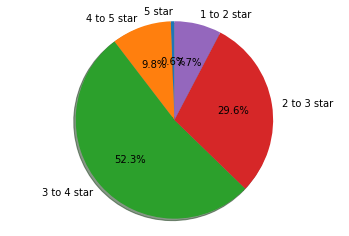

In [ ]:
import matplotlib.pyplot as plt
print('Split of movies count based on their overall average rating')
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '5 star', '4 to 5 star', '3 to 4 star', '2 to 3 star', '1 to 2 star'
sizes = [10, 163, 871, 492, 128]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [ ]:
avg_highly_rated_movies.reset_index(level=0, inplace=True)

In [ ]:
avg_highly_rated_movies.columns = ['movie title', 'avg rating']

avg_highly_rated_movies.head(10)

,movie title,avg rating
0,Marlene Dietrich: Shadow and Light (1996),5.0
1,Prefontaine (1997),5.0
2,Santa with Muscles (1996),5.0
3,Star Kid (1997),5.0
4,Someone Else's America (1995),5.0
5,Entertaining Angels: The Dorothy Day Story (1996),5.0
6,"Saint of Fort Washington, The (1993)",5.0
7,"Great Day in Harlem, A (1994)",5.0
8,They Made Me a Criminal (1939),5.0
9,Aiqing wansui (1994),5.0


These are the top 10 movies that can be naviely suggested to the new users, **Recommendations based on top average ratings.**

-----------------------------

In [ ]:
merged_dataset.groupby(['movie title']).agg({"rating":"sum"})['rating'].sort_values(ascending=False)

movie title
Star Wars (1977)                  2541
Fargo (1996)                      2111
Return of the Jedi (1983)         2032
Contact (1997)                    1936
Raiders of the Lost Ark (1981)    1786
                                  ... 
Leopard Son, The (1996)              1
Liebelei (1933)                      1
Bird of Prey (1996)                  1
Lotto Land (1995)                    1
Daens (1992)                         1
Name: rating, Length: 1664, dtype: int64

In [ ]:
popular_movies = merged_dataset.groupby(['movie title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)


In [ ]:
popular_movies = popular_movies.to_frame()
popular_movies.reset_index(level=0, inplace=True)
popular_movies.columns = ['movie title', 'Number of Users watched']

In [ ]:
print("Number of popular movies with more than 500 viewers: ",len(popular_movies[popular_movies['Number of Users watched'] >= 500]))
print("Number of popular movies with more than 400 and less than 500 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 400) & (popular_movies['Number of Users watched'] < 500)]))
print("Number of popular movies with more than 300 and less than 400 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 300) & (popular_movies['Number of Users watched'] < 400)]))
print("Number of popular movies with more than 200 and less than 300 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 200) & (popular_movies['Number of Users watched'] < 300)]))
print("Number of popular movies with more than 100 and less than 200 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 100) & (popular_movies['Number of Users watched'] < 200)]))
print("Number of popular movies with less than 100 viewers: ", len(popular_movies[(popular_movies['Number of Users watched'] < 100)]))


Number of popular movies with more than 500 viewers:  4
Number of popular movies with more than 400 and less than 500 viewers:  8
Number of popular movies with more than 300 and less than 400 viewers:  22
Number of popular movies with more than 200 and less than 300 viewers:  84
Number of popular movies with more than 100 and less than 200 viewers:  220
Number of popular movies with less than 100 viewers:  1326


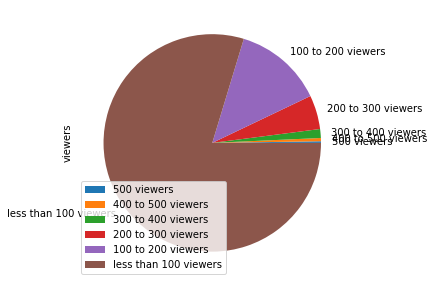

In [ ]:

df = pd.DataFrame({'viewers': [4, 8, 22, 84, 220, 1326]},
                  index=['500 viewers', '400 to 500 viewers', '300 to 400 viewers', '200 to 300 viewers', '100 to 200 viewers', 'less than 100 viewers'])
plot = df.plot.pie(y='viewers', figsize=(5, 5))


We can consider the movies which have more than 400 viewers as **POPULAR** and there are 12 movies.

-------------------------

In [ ]:
popular_movies[popular_movies['Number of Users watched'] >= 400]

,movie title,Number of Users watched
0,Star Wars (1977),583
1,Contact (1997),509
2,Fargo (1996),508
3,Return of the Jedi (1983),507
4,Liar Liar (1997),485
5,"English Patient, The (1996)",481
6,Scream (1996),478
7,Toy Story (1995),452
8,Air Force One (1997),431
9,Independence Day (ID4) (1996),429


These are the most popular movies which can be recommended to a new user. **Recommendations based on Popularity**

----------------------------

In [ ]:
highly_rated_popular_movies = pd.merge(avg_highly_rated_movies, popular_movies, how = 'inner', on='movie title')
highly_rated_popular_movies.head(10)

,movie title,avg rating,Number of Users watched
0,Marlene Dietrich: Shadow and Light (1996),5.0,1
1,Prefontaine (1997),5.0,3
2,Santa with Muscles (1996),5.0,2
3,Star Kid (1997),5.0,3
4,Someone Else's America (1995),5.0,1
5,Entertaining Angels: The Dorothy Day Story (1996),5.0,1
6,"Saint of Fort Washington, The (1993)",5.0,2
7,"Great Day in Harlem, A (1994)",5.0,1
8,They Made Me a Criminal (1939),5.0,1
9,Aiqing wansui (1994),5.0,1


In [ ]:
highly_rated_popular_movies[highly_rated_popular_movies['Number of Users watched']>400]

,movie title,avg rating,Number of Users watched
23,Star Wars (1977),4.358491,583
34,"Godfather, The (1972)",4.283293,413
40,Raiders of the Lost Ark (1981),4.252381,420
64,Fargo (1996),4.155512,508
129,Return of the Jedi (1983),4.007890,507
236,Toy Story (1995),3.878319,452
292,Contact (1997),3.803536,509
412,"English Patient, The (1996)",3.656965,481
428,Air Force One (1997),3.631090,431
597,Scream (1996),3.441423,478


## Recommendations based on Movie Genre to a New User.

In [ ]:
movie_genre_list = column_names2[-19:]
movie_genre_list

['unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

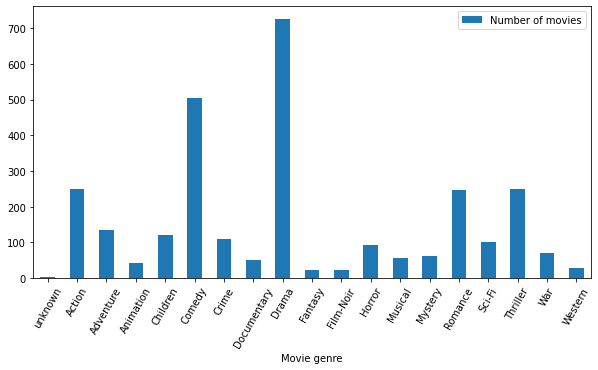

In [ ]:
count = []
for i in movie_genre_list:
  # print(i)
  genre_based_movies = items_dataset[['movie id','movie title',i]]
  genre_based_movies = genre_based_movies[genre_based_movies[i] == 1]
  count.append(len(genre_based_movies))
  # merged_genre_movies = pd.merge(dataset, genre_based_movies, how='inner', on='movie id')
  # star_based_visualization(merged_genre_movies)
df = pd.DataFrame({'Movie genre':movie_genre_list, 'Number of movies':count})
ax = df.plot.bar(x='Movie genre', y='Number of movies', rot=60, figsize=(10, 5))

We can see that most of the movies belong to movie genre : **Drama** followed by **Comedy** then **Action, Romance and Thriller**

In [ ]:
def star_based_visualization(dataframe):
  dataframe['rating'].value_counts(sort=False).plot(kind='bar' ,figsize=(10,6), use_index = True, rot=0)
  plt.title('Bar plot of rating frequency')
  plt.xlabel('Rating')
  plt.ylabel('Number of times a rating was given')
  # label = list(dataframe['rating'].value_counts(sort=False))
  plt.show()
  print("Total number of users watched this Genre: ",len(dataframe))
  print("  ")


# Rough Work

In [ ]:
x = 'Western'
genre_based_movies = items_dataset[['movie id','movie title',x]]
genre_based_movies = genre_based_movies[genre_based_movies[x] == 1]
merged_genre_movies = pd.merge(dataset, genre_based_movies, how='inner', on='movie id')
merged_genre_movies.head()


,user id,movie id,rating,timestamp,movie title,Western
0,244,51,2,880606923,Legends of the Fall (1994),1
1,85,51,2,879454782,Legends of the Fall (1994),1
2,201,51,2,884140751,Legends of the Fall (1994),1
3,198,51,3,884208455,Legends of the Fall (1994),1
4,330,51,5,876546753,Legends of the Fall (1994),1


In [ ]:
len(merged_genre_movies)

1854

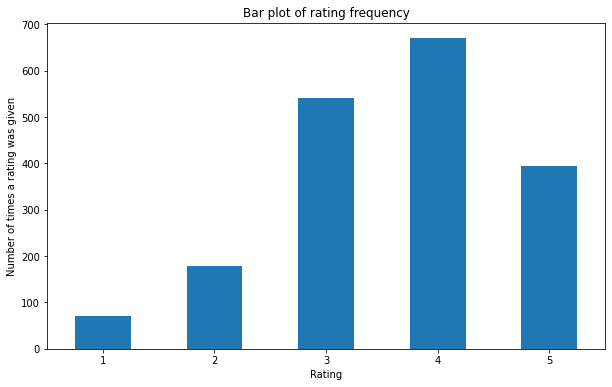

Total number of users watched this Genre:  1854
  


In [ ]:
star_based_visualization(merged_genre_movies)

In [ ]:
high_rated_movies = merged_genre_movies.groupby(['movie title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
high_rated_movies = high_rated_movies.to_frame()
print("These are the top movies that can be naviely suggested to the new users for the requested movie genre:", x, ". Recommendations based on top average ratings.")
high_rated_movies.head(10)

These are the top movies that can be naviely suggested to the new users for the requested movie genre: Western . Recommendations based on top average ratings.


,rating
movie title,
High Noon (1952),4.102273
"Wild Bunch, The (1969)",4.023256
Butch Cassidy and the Sundance Kid (1969),3.949074
"Magnificent Seven, The (1954)",3.942149
Once Upon a Time in the West (1969),3.868421
Unforgiven (1992),3.868132
"Good, The Bad and The Ugly, The (1966)",3.861314
Dead Man (1995),3.823529
Dances with Wolves (1990),3.792969


In [ ]:
popular_movies_ingenre = merged_genre_movies.groupby(['movie title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)
popular_movies_ingenre = popular_movies_ingenre.to_frame()
popular_movies_ingenre.reset_index(level=0, inplace=True)
popular_movies_ingenre.columns = ['movie title', 'Number of Users watched']

In [ ]:
# popular_movies[popular_movies['Number of Users watched'] >= 400]
print("These are the most popular movies which can be recommended to a new user in",x,"genre. Recommendations based on Popularity")
popular_movies_ingenre.sort_values('Number of Users watched', ascending=False).head(10)

These are the most popular movies which can be recommended to a new user in Western genre. Recommendations based on Popularity


,movie title,Number of Users watched
0,Dances with Wolves (1990),256
1,Butch Cassidy and the Sundance Kid (1969),216
2,Unforgiven (1992),182
3,"Good, The Bad and The Ugly, The (1966)",137
4,Maverick (1994),128
5,"Magnificent Seven, The (1954)",121
6,Tombstone (1993),108
7,Young Guns (1988),101
8,High Noon (1952),88
9,Legends of the Fall (1994),81


In [ ]:
highly_rated_popular_movies = pd.merge(high_rated_movies, popular_movies_ingenre, how = 'inner', on='movie title')
highly_rated_popular_movies.head(10)

,movie title,rating,Number of Users watched
0,High Noon (1952),4.102273,88
1,"Wild Bunch, The (1969)",4.023256,43
2,Butch Cassidy and the Sundance Kid (1969),3.949074,216
3,"Magnificent Seven, The (1954)",3.942149,121
4,Once Upon a Time in the West (1969),3.868421,38
5,Unforgiven (1992),3.868132,182
6,"Good, The Bad and The Ugly, The (1966)",3.861314,137
7,Dead Man (1995),3.823529,34
8,Dances with Wolves (1990),3.792969,256
9,Tombstone (1993),3.666667,108


In [ ]:
items_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
